In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import umap
import os
from datetime import datetime, timedelta
import pickle
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import datetime

import re
import string
from collections import Counter

#Visualizations

import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

from wordcloud import STOPWORDS
import scipy.sparse
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
import seaborn as sns; sns.set()
nltk.download('wordnet')
stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package wordnet to /home/jzhu10/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import re
import contractions
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = "I'VE guru99 is a totally new kind of learning experience."
def pos_stem(text):
    tokens = word_tokenize(text)
    lemma_function = WordNetLemmatizer()
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
        #print(pos_tag)
        #print(token, "=>", lemma)
        t = re.compile(re.escape(token), re.IGNORECASE)
        text = t.sub(lemma, text)
    return text
pos_stem(text)

"I'VE guru99 be a totally new kind of learn experience."

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jzhu10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jzhu10/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
df = pd.read_csv('./depression_1922.csv')

In [6]:
df.head(3)

,author,created_utc,selftext,title,subreddit
0,Supreme_wing,2019-04-01 00:03:28,god. i dont get people sometimes. just some pe...,Just a rant on a Sunday night,depression
1,tubrafinho,2019-04-01 00:13:47,"this will be my first post here, and i'm relat...",what to do when you really want to die but at ...,depression
2,zillarillazilla,2019-04-01 00:14:20,apologies if this isn’t allowed - feel free to...,How to help my friend,depression


In [5]:
# Clean the dataframe by dropping any null values
df.dropna(inplace=True)

In [6]:
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    # Remove short words (less than 3 characters)
    text = ' '.join([word for word in text.split() if len(word) > 2])
    
    # Remove numbers
    text = ''.join([word for word in text if not word.isdigit()])
    
    # Fix contractions
    text = contractions.fix(text)
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text


In [7]:
df['text'] = df.selftext.apply(clean_text)

In [8]:
df.shape

(438585, 6)

In [9]:
new_df = df[["created_utc", "text"]].copy()
new_df.to_csv("Git_Depression19_22.csv", index=False)


In [10]:
new_df.head(3)

,created_utc,text
0,2019-04-01 00:03:28,god get people sometimes people tendency make ...
1,2019-04-01 00:13:47,first post relatively new reddit two year ever...
2,2019-04-01 00:14:20,apology allowed feel free point elsewhere frie...


In [12]:
#step2 Find the optimal k for clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a vectorizer to convert text into vectors
vectorizer = TfidfVectorizer(stop_words="english")

# Transform the selftext column into vectors
text_vectors = vectorizer.fit_transform(df["text"])

# Try different k values and compute the silhouette score for each one
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(text_vectors)
    score = silhouette_score(text_vectors, kmeans.labels_)
    print(f"k={k}: silhouette score={score}")


KeyboardInterrupt: 

In [ ]:
#step3 clustering analysis
# Fit the KMeans model with the optimal k value (in this case, k=8)
kmeans = KMeans(n_clusters=8, random_state=42).fit(text_vectors)

# Add the cluster labels to the DataFrame
df["cluster"] = kmeans.labels_

# Print the number of posts in each cluster
print(df["cluster"].value_counts())


In [14]:
# Develop TF-IDF features
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_df=0.75, min_df=0.001, use_idf=True)
posts_tfidf_bow = vectorizer.fit_transform(df1['text'].values.astype('U'))

In [15]:
# Examine TF-IDF features
print(vectorizer.get_feature_names()[0:20])
print(len(vectorizer.get_feature_names()))

['abandon', 'abandoned', 'abandonment', 'abilify', 'ability', 'able', 'able afford', 'able anything', 'able enjoy', 'able feel', 'able find', 'able function', 'able get', 'able handle', 'able help', 'able hold', 'able keep', 'able live', 'able make', 'able move']
12324


In [16]:
# Import required packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

In [50]:

# Test different cluster sizes
init_vals = np.random.choice(np.arange(100), size=10, replace=False)
silhouette_vals = []
sse_vals = []
for selected_k in np.array([10,11,12,13,14,15,16,17,18,19, 20, 21, 22, 23, 24, 25]):
  print("Cluster")
  print(selected_k)
  for i in np.arange(3):
    print("Rep")
    print(i)
    km = MiniBatchKMeans(n_clusters=selected_k, init='k-means++', n_init=1, init_size=1000, 
                     batch_size=1000, random_state = init_vals[i])
    km.fit(posts_tfidf_bow)
    silhouette_vals.append(metrics.silhouette_score(posts_tfidf_bow, km.labels_, sample_size=1000))
    sse_vals.append(km.inertia_)

Cluster
10
Rep
0
Rep
1
Rep
2
Cluster
11
Rep
0
Rep
1
Rep
2
Cluster
12
Rep
0
Rep
1
Rep
2
Cluster
13
Rep
0
Rep
1
Rep
2
Cluster
14
Rep
0
Rep
1
Rep
2
Cluster
15
Rep
0
Rep
1
Rep
2
Cluster
16
Rep
0
Rep
1
Rep
2
Cluster
17
Rep
0
Rep
1
Rep
2
Cluster
18
Rep
0
Rep
1
Rep
2
Cluster
19
Rep
0
Rep
1
Rep
2
Cluster
20
Rep
0
Rep
1
Rep
2
Cluster
21
Rep
0
Rep
1
Rep
2
Cluster
22
Rep
0
Rep
1
Rep
2
Cluster
23
Rep
0
Rep
1
Rep
2
Cluster
24
Rep
0
Rep
1
Rep
2
Cluster
25
Rep
0
Rep
1
Rep
2


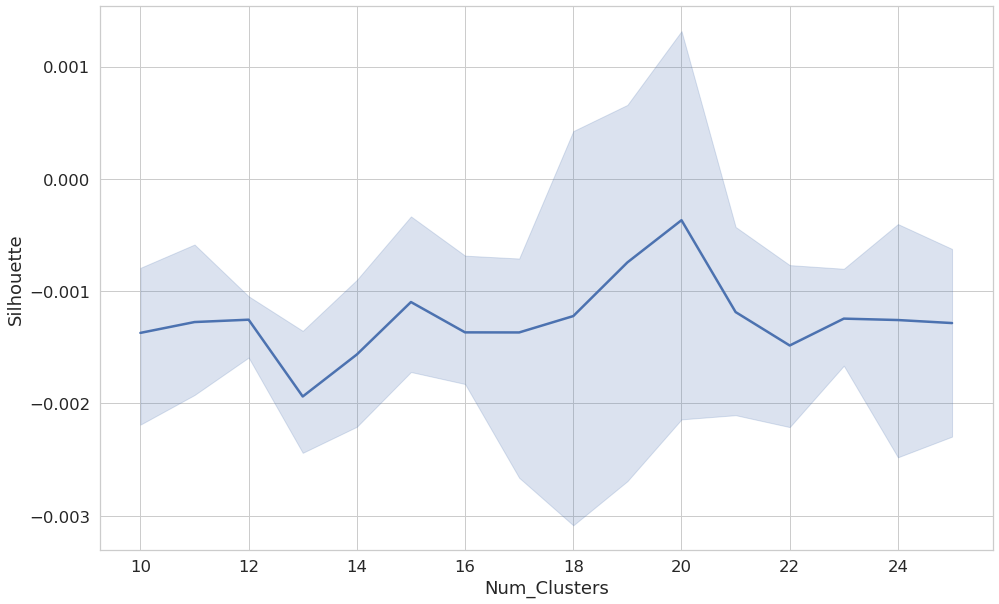

In [51]:
# Set k values to test
n_clusters = np.repeat(np.array([10,11,12,13,14,15,16,17,18,19, 20, 21, 22, 23, 24, 25]), 3)

# Plot silhouette scores
 
to_plot_df = {'Init_Value': np.repeat(init_vals[0:3], 16), 'Silhouette': silhouette_vals, 
             'Num_Clusters': n_clusters}
to_plot_df = pd.DataFrame(data=to_plot_df)
ax = sns.lineplot(x="Num_Clusters", y="Silhouette", data=to_plot_df)

In [52]:
# Generate clusters for a selected k
selected_k = 20
km = MiniBatchKMeans(n_clusters=selected_k, init='k-means++', n_init=3, init_size=1000, 
                     batch_size=1000)
km.fit(posts_tfidf_bow)

MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=20)

In [53]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(posts_tfidf_bow, km.labels_, sample_size=1000))

Silhouette Coefficient: -0.000


In [17]:
# Generate clusters for a selected k
selected_k = 15
km = MiniBatchKMeans(n_clusters=selected_k, init='k-means++', n_init=3, init_size=1000, 
                     batch_size=1000)
km.fit(posts_tfidf_bow)

MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=15)

In [18]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(posts_tfidf_bow, km.labels_, sample_size=1000))

Silhouette Coefficient: -0.002


In [19]:
# Identify the top terms for each cluster, using the TF-IDF terms with the highest values in the centroid
# Adapted From: https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(selected_k):
  print("Cluster %d:" % i, end='')
  for ind in order_centroids[i, :19]:
    print(' %s' % terms[ind], end='')
  print()

Top terms per cluster:
Cluster 0: depression help anxiety year know medication feel like anyone get really time med taking month doctor would therapy week
Cluster 1: school class year high school high like college grade get feel know even going time want friend life cannot really
Cluster 2: tired want feel like cannot life feeling sleep get know anymore tired tired tired feeling everything even time day people anything
Cluster 3: good better get get better feel thing enough like know life good enough never people time want really cannot think even
Cluster 4: job work get cannot year like feel life money time know want even going got working month day would
Cluster 5: friend like talk people one feel know really want best friend best time even year would alone make always never
Cluster 6: life feel like make nothing people feel like know thing cannot want would happy live even get never living year
Cluster 7: used game like feel thing video video game even cannot anymore anything get pl

In [32]:
# Store cluster numbers and annotations 
df1['cluster_number'] = km.labels_

/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
# Define the clustering and their corresponding themes
clustering_dict = {
    0: "Depression, anxiety, and medication",
    1: "Academic and school-related stress",
    2: "Fatigue and tiredness",
    3: "Self-improvement and personal growth",
    4: "Job-related stress",
    5: "Social relationships and friendship",
    6: "Entertainment and hobbies",
    7: "Depression, anxiety, and medication",
    8: "Depression, anxiety, and medication",
    9: "Self-improvement and personal growth",
    10: "Life events and changes",
    11: "Depression, anxiety, and medication",
    12: "Life events and changes",
    13: "Social relationships and friendship",
    14: "Fatigue and tiredness"
}

# Create a new column in the dataframe with the corresponding theme for each clustering number
df1['theme'] = df1['cluster_number'].map(clustering_dict)


/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
df1['theme'].value_counts()

Depression, anxiety, and medication     107490
Self-improvement and personal growth     94056
Social relationships and friendship      72792
Life events and changes                  41062
Fatigue and tiredness                    37770
Entertainment and hobbies                29452
Job-related stress                       17770
Academic and school-related stress       14187
Name: theme, dtype: int64

In [59]:
# Set date to datetime format. I'm assuming it's day.month.year in your original dataframe
df1['date'] = pd.to_datetime(df1['created_utc'])
df1.set_index('date', inplace=True)
#new_df = (df.groupby(['cluster_annotations', pd.Grouper(freq='M')]).count())
df2 = df1.groupby([pd.Grouper(freq='M'),'theme']).count()



/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
df2.head(10)

author  created_utc  \
date       theme                                                       
2019-01-31 Academic and school-related stress       390          390   
           Depression, anxiety, and medication     2338         2338   
           Entertainment and hobbies                596          596   
           Fatigue and tiredness                    777          777   
           Job-related stress                       392          392   
           Life events and changes                  999          999   
           Self-improvement and personal growth    2043         2043   
           Social relationships and friendship     1599         1599   
2019-02-28 Academic and school-related stress       409          409   
           Depression, anxiety, and medication     2365         2365   

                                                 selftext  title  subreddit  \
date       theme                                                              
2019-01-31 Academic and school-related stress         390    390        390   
           Depression, anxiety, and medication       2338   2338       2338   
           Entertainment and hobbies                  596    596        596   
           Fatigue and tiredness                      777    777        777   
           Job-related stress                         392    392        392   
           Life events and changes                    999    999        999   
           Self-improvement and personal growth      2043   2043       2043   
           Social relationships and friendship       1599   1599       1599   
2019-02-28 Academic and school-related stress         409    409        409   
           Depression, anxiety, and medication       2365   2365       2365   

                                                 text  length  cluster_number  
date       theme                                                               
2019-01-31 Academic and school-related stress     390     390             390  
           Depression, anxiety, and medication   2338    2338            2338  
           Entertainment and hobbies              596     596             596  
           Fatigue and tiredness                  777     777             777  
           Job-related stress                     392     392             392  
           Life events and changes                999     999             999  
           Self-improvement and personal growth  2043    2043            2043  
           Social relationships and friendship   1599    1599            1599  
2019-02-28 Academic and school-related stress     409     409             409  
           Depression, anxiety, and medication   2365    2365            2365

Text(0.5, 1.0, 'Clustering Analysis of r/Depression Posts')

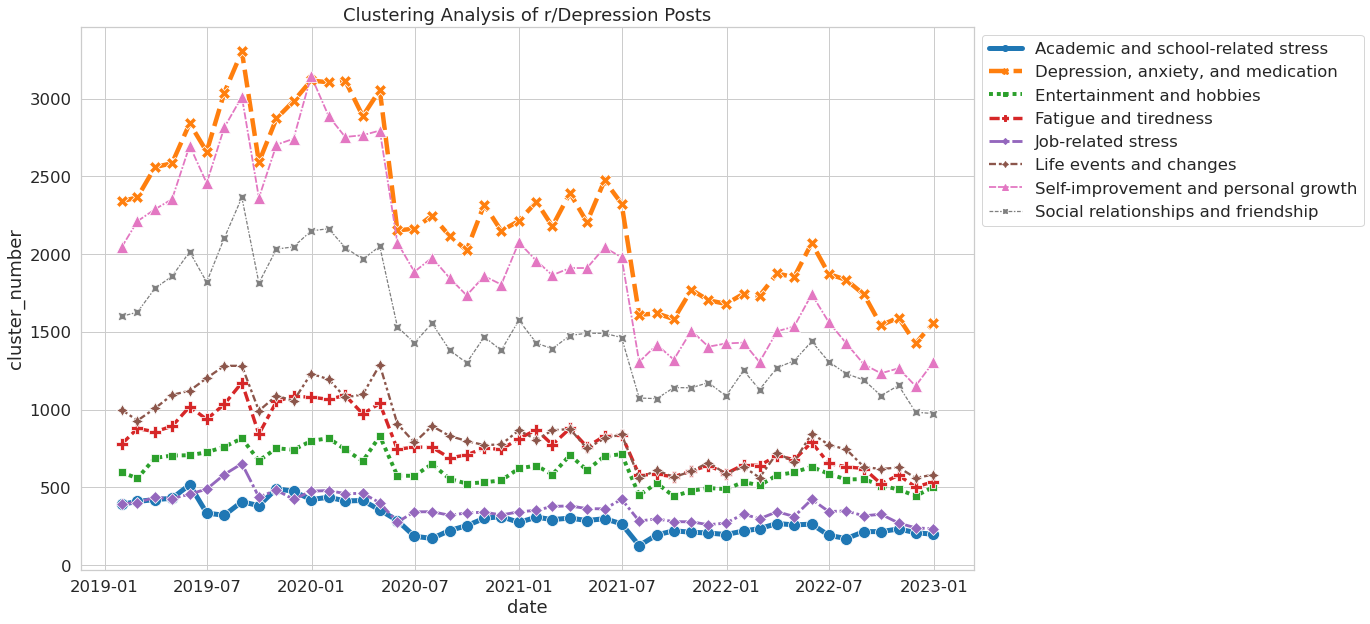

In [61]:
# Plot the responses for different events and regions
sns.set(rc={"figure.figsize":(16, 10)})
sns.set_style("whitegrid")
kwargs = dict(markersize = 12)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
lp = sns.lineplot(data=df2, x="date", y="cluster_number", hue="theme",  **kwargs, size = "theme",style= "theme", legend="brief", dashes = True, ci = None, palette= "tab10",markers = True)
lp.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Clustering Analysis of r/Depression Posts")